Used libraries:

In [57]:
import graph_tool.all as gt
import random
import time

Global variables:

- file: contains the file's path.

- L: maximum size of a component.

In [58]:
file = "karate.gml"
L = 5

Defining functions:

- createGraph(file): takes the file's path as an input and returns the graph as a Graph tool object.

- drawGraph(file): takes a graph tool graph and draw it on screen.

- calculateMIS(graph): takes a graph as an output, calculates its maximal independent set then returns a list of boolean: 1 if a vertex is part of the MIS and 0 otherwise. The length of the list is the size of the graph. 

In [59]:
def createGraph(file):
    return gt.load_graph(file)

def drawGraph(Graph):
    gt.graph_draw(Graph, vertex_text=Graph.vertex_index, vertex_font_size=18, output=None)
    
def calculateMIS(Graph):
    return gt.max_independent_vertex_set(Graph)

Main program:

<Graph object, undirected, with 34 vertices and 78 edges at 0x7faf35ddda50>


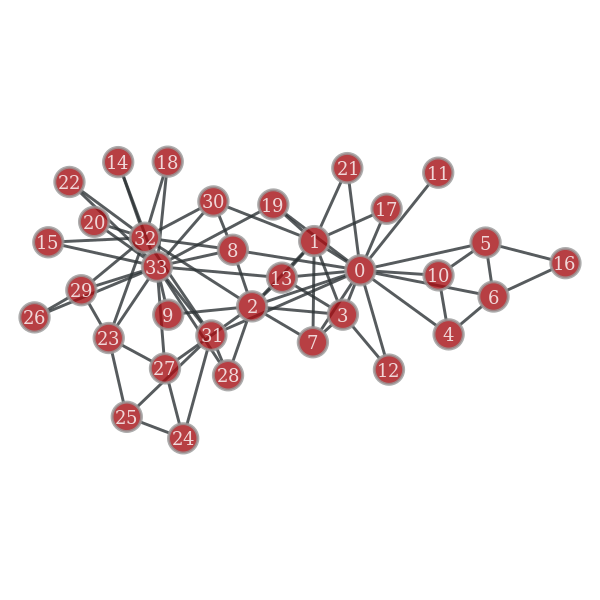

In [60]:
#Create graph
mainGraph = createGraph(file)
#print its descriptions
print(mainGraph)
#draw it
drawGraph(mainGraph)

Now we calculate the MIS using the predefined graph tool function then show it on the graph. 
To extract the MIS vertices, we use a filter.

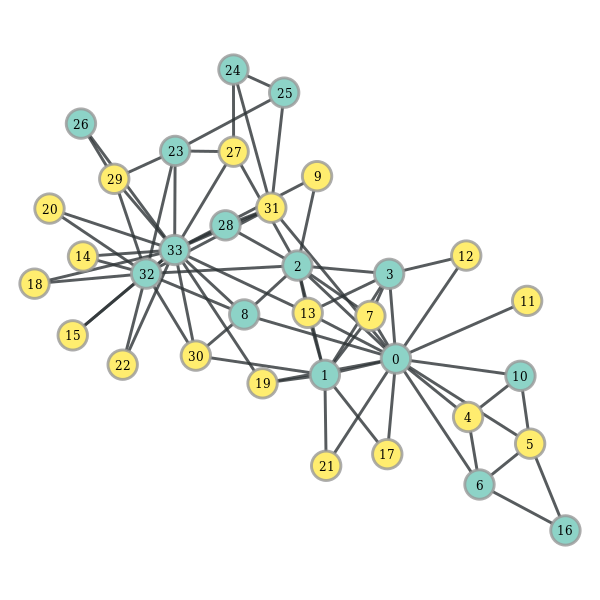

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7faf35ddda50, at 0x7faf35dd2e10>

In [61]:
#Calculate MIS
MIS = calculateMIS(mainGraph)
#Show MIS on the main Graph (nodes in yellow)
gt.graph_draw(mainGraph,vertex_text = mainGraph.vertex_index, vertex_fill_color = MIS, output = None)

We create a deep copy from the main graph, test graph, that contains the MIS only and use it to test components size when adding random vertices. 

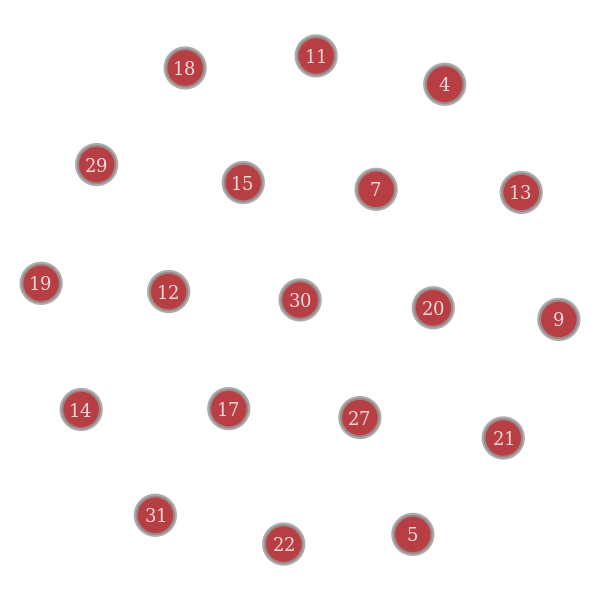

In [62]:
#We make a deep copy of the mainGraph
testGraph = gt.Graph(mainGraph)
#We filter out the nodes that remain in the MIS.
testGraph.set_vertex_filter(MIS, inverted = True)
#We create a sequence that contains remvseq = all_vertices - MIS.
remvseq = list(testGraph.get_vertices())
#we change the testGraph so that it contains the MIS
testGraph.set_vertex_filter(MIS, inverted = False)
#We show the testGraph
drawGraph(testGraph)

In [63]:
#We make a deep copy of remvseq
tempvseq = remvseq.copy()

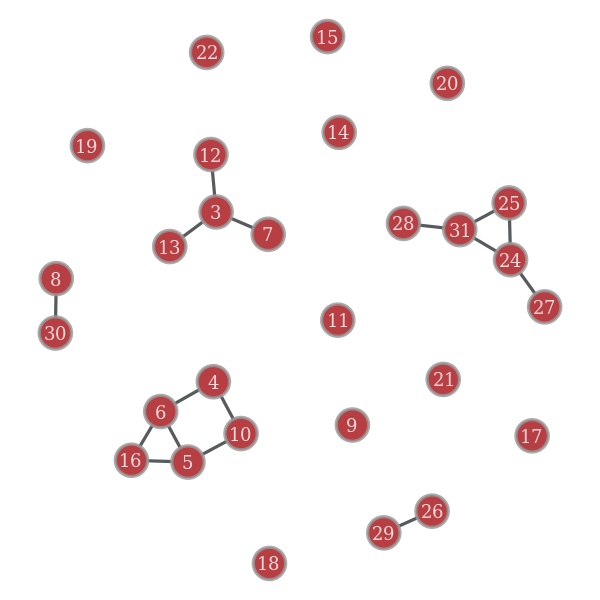

In [64]:
while True:
    minSize = -1
    minV = -1
    while len(remvseq) > 0:
        rndmV = random.choice(remvseq)
        #print("Random vertex:", rndmV)
        MIS[rndmV] = True
        #drawGraph(testGraph)
        component = gt.label_out_component(testGraph, testGraph.vertex(rndmV))

        #print(component.a)
        componentSize = list(component.a).count(1)
        #print("size", componentSize)

        if componentSize <= L:
            if minSize == -1 or minSize >= componentSize or minV == -1:
                minSize = componentSize
                minV = rndmV

        MIS[rndmV] = False        
        remvseq.remove(rndmV)        

    #print("min size", minSize, " min vertex:", minV)
    if minV in tempvseq:
        MIS[minV] = True
        tempvseq.remove(minV)
        remvseq = tempvseq.copy()
    else:
        break
drawGraph(testGraph)